## Opening Shopping Malls for tourists in Lahore

The purpose of this capstone project is to find the neighborhoods in Lahore, Pakistan where there are not enough shopping malls close to the hotels so the tourists don’t have to move across taking taxi or buses to do shopping and utilize the time they save exploring the landmarks of the city for which it is gaining popularity day by day. This initiative can definitely please the tourists and the more tourists are pleased with the place the more people will visit in the future and this will eventually help the tourism industry to grow in Lahore. Moreover, if the venture gets successful in Lahore this model can be replicated to the other major cities in Pakistan.

### Importing necessary libraries

<div>numpy to handle data in a vectorized manner<br>
pandas to work with dataframes<br>
json to handle JSON get requests from foursquare API<br>
Nominatim to convert an address into latitude and longitude values<br>
geocoder to get coordinates<br>
requests to handle GET requests<br>
BeautifulSoup to parse the HTML<br>
json_normalize to tranform JSON file into a pandas dataframe<br>
matplotlib to visualise data<br>
sklearn for Machine Learning Algorithm KMeans Clustering<br>
folium to render maps<br>
re to use regular expressions to manipulate string data<br>
math to calculate distance between two coordinates<br>
scipy spatial distance to form elbow graph for KMeans<br></div>

In [2]:
import numpy as np

import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json

from geopy.geocoders import Nominatim
import geocoder

import requests
from bs4 import BeautifulSoup 

from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

import re

from math import sin, cos, sqrt, atan2, radians

from scipy.spatial.distance import cdist 

print("Libraries imported.")

Libraries imported.


### Getting the html data from MapCrow regarding the suburbs of Lahore

<div>First we send a GET request to the link <b>http://www.mapcrow.info/Lahore-PK-suburbs</b> and get its text</div>

In [3]:
data = requests.get("http://www.mapcrow.info/Lahore-PK-suburbs").text

Now we will use BeautifulSoup to parse the text we got as HTML

In [4]:
soup = BeautifulSoup(data, 'html.parser')

We initialise the list of coordinates and the neighborhoods dataframe

In [5]:
coordinates = []
neighborhoods = pd.DataFrame(columns=['Neighborhood','Latitude','Longitude'])

<div>We will further traverse the HTML to get all button tags and fetch text from their attributes "on click"<br>
The onclick attribute looks like this: <b>onclick="maparea('32.4853780','74.4849863','Adalat Garh'); return false;"</b></div>


In [6]:
full_tag = soup.findAll("button")

for each_tag in full_tag:
    staininfo_attrb_value = each_tag["onclick"]
    coordinates.append(staininfo_attrb_value)


<div>Now once we have one row each for one neighborhood we will clean the data and insert it into our neighborhoods dataframe<br><br>

We will use regex to remove the unnecessary part from each row i.e. brackets, single quotes, semicolon, extra text<br><br>

After that we will split the data with comma and insert the data into the dataframe</div>

In [7]:
for each_coordinate in coordinates:
    new_String = re.sub("\'","",re.sub("\); return false;","",re.sub("maparea\(","",each_coordinate)))
    latitude,longitude,Neighborhood_Name = re.split(",",new_String)
    new_row = {'Neighborhood':Neighborhood_Name, 'Latitude':latitude, 'Longitude':longitude}
    neighborhoods = neighborhoods.append(new_row,ignore_index=True)

Our dataset had duplicates, i.e. multiple rows for each neighborhood so we removed them

This is how our dataset looks now

In [8]:
neighborhoods = neighborhoods.drop_duplicates(subset='Neighborhood', keep="first")
neighborhoods

,Neighborhood,Latitude,Longitude
0,Abdullah Colony,32.4765492,74.5473349
1,Adalat Garh,32.4853780,74.4849863
2,Agrics Town,31.4415700,74.2244467
3,Ahmad Nagar,32.4785100,74.5584835
4,Ajmal Town,32.4850527,74.5037069
5,Ali Park,31.4996549,74.4073399
6,Ali View,31.4931287,74.4041212
7,Allama Iqbal Town,32.4947268,74.5028911
10,Anarkli,31.5679445,74.3074319
11,Askari Flats,31.4933113,74.3848557


In [9]:
neighborhoods.shape

(159, 3)

### Getting the coordinates of Lahore using GeoCoder Library

In [10]:
address = 'Lahore'

geolocator = Nominatim(user_agent="lahore_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lahore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lahore are 31.5656822, 74.3141829.


<div><b>Now, as discussed in the document the dataset contains all the suburbs of Lahore District and not Lahore City. So for that we will have to filter only the suburbs that are located in the Lahore City.</b><br>

Let's define a function that takes coordinates of a neighborhood and calculates the distance between the neighborhood and Lahore City.</div>

In [127]:
def get_distance(lat1,lon1,lat2,lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return float(distance)



Now let's iterate over all the neighborhoods and filter out all the neighborhoods that have more than 50km distance from Lahore City

In [138]:
for index,ne in neighborhoods.iterrows():
    if get_distance(float(ne['Latitude']),float(ne['Longitude']),float(latitude),float(longitude)) > 50:
        neighborhoods = neighborhoods[neighborhoods['Neighborhood'] != ne['Neighborhood']]

neighborhoods.shape        

(64, 3)

Now, we are left with 64 suburbs. Let's visualise them on the map of Lahore

In [139]:
map_lahore = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lahore)  
    
map_lahore

### Getting venues data from Foursquare API

In [140]:
CLIENT_ID = 'xxxxxxxxxxxxxxxxxxxxxxxxxxx'
CLIENT_SECRET = 'xxxxxxxxxxxxxxxxxxxxxxxx'
VERSION = '20200710' 

Now getNearbyVenues function will take name and coordinates of a neighborhood and find all venues within the 3km radius.

In [141]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Let's iterate through all the neighborhoods and get venues

In [142]:
lahore_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Agrics Town
Ali Park
Ali View
Anarkli
Askari Flats
Askari Villas
Awan Town
Badami Bagh
Bahria Town
Canal Gardens
DHA EME Sector
Defence
Eden Cottages
Farooq colony
Fazaia Housing Scheme
Fort Villa
Garden Town
Gawalmandi
Ghazi Abad
Gulburg
Iqbal Park
Islampura
Izmir Town
Jhuggian Ladha Singh
Johar Town
Jubilee Town
Kot Lakhpat
Labor Colony
Lahore Cantt
Lake City
Liaqatabad
Maraka
Mazang
Model Colony
Muslim Town
Mustafa Town
Naz Town
Nishat Colony
Noor Colony
PAEC Foundation Housing
PAF Colony
PIA Housing Society
Police Lines
Punjab Cooperative Housing Society
Punjab Govt Servants Housing Foundation
Qadri Colony
Rana Town
Rehman Gardens
Rehman Pura
Rehman Villas
Sadhoke
Samanabad
Sec FF Ph 4
Shad Bagh
Sukh Chayn Gardens
Super Town
TRICON VILLAGE
Tariq Garden
Town Ship Industrial Estate
Township
Urdu Bazar
Valencia
WAPDA Town
Zaman Park


So, we have a list of 2480 venues

In [143]:
print(lahore_venues.shape)
lahore_venues.head()

(2480, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agrics Town,31.4415700,74.2244467,بنیرا ریسٹورینٹ,31.447292,74.215225,Asian Restaurant
1,Agrics Town,31.4415700,74.2244467,Ze Grill,31.434475,74.213072,Steakhouse
2,Agrics Town,31.4415700,74.2244467,Metro Cash & Carry,31.466627,74.235285,Department Store
3,Agrics Town,31.4415700,74.2244467,Kitchen Cuisine,31.455307,74.216940,Dessert Shop
4,Agrics Town,31.4415700,74.2244467,Synergy Health Fitness,31.463321,74.235354,Gym / Fitness Center


Let's group the venues to see how many venues each neighborhood has within the 3km radius

In [144]:
lahore_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agrics Town,6,6,6,6,6,6
Ali Park,34,34,34,34,34,34
Ali View,38,38,38,38,38,38
Anarkli,55,55,55,55,55,55
Askari Flats,70,70,70,70,70,70
Askari Villas,20,20,20,20,20,20
Awan Town,5,5,5,5,5,5
Badami Bagh,19,19,19,19,19,19
Bahria Town,12,12,12,12,12,12


Let's see how many unique categories we have

In [164]:
print('There are {} uniques categories.'.format(len(lahore_venues['Venue Category'].unique())))

There are 115 uniques categories.


Now let's use One hot encoding to convert the categories into a form where our clustering algorithm will perform well

In [165]:
lahore_onehot = pd.get_dummies(lahore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lahore_onehot['Neighborhood'] = lahore_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [lahore_onehot.columns[-1]] + list(lahore_onehot.columns[:-1])
lahore_onehot = lahore_onehot[fixed_columns]

lahore_onehot.head()

,Zoo,Accessories Store,Afghan Restaurant,Airport Lounge,Airport Terminal,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Burger Joint,Bus Station,Café,Camera Store,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Coworking Space,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space,Farm,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hotel,Housing Development,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lebanese Restaurant,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Monument / Landmark,Mosque,Movie Theater,Multiplex,Neighborhood,Outdoors & Recreation,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Recreation Center,Resort,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Social Club,Spa,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tech Startup,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Train Station,Warehouse Store,Wings Joint,Women's Store
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agrics Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agrics Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agrics Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agrics Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agrics Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
lahore_onehot.shape

(2480, 115)

Let's group the encoded data by Newighborhood and get mean value of each category in each neighborhood

In [167]:
lahore_grouped = lahore_onehot.groupby('Neighborhood').mean().reset_index()
lahore_grouped

,Neighborhood,Zoo,Accessories Store,Afghan Restaurant,Airport Lounge,Airport Terminal,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Burger Joint,Bus Station,Café,Camera Store,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Coworking Space,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space,Farm,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hotel,Housing Development,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lebanese Restaurant,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Monument / Landmark,Mosque,Movie Theater,Multiplex,Outdoors & Recreation,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Recreation Center,Resort,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Social Club,Spa,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tech Startup,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Train Station,Warehouse Store,Wings Joint,Women's Store
0,Agrics Town,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Ali Park,0.000000,0.000000,0.029412,0.058824,0.058824,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.029412,0.058824,0.029412,0.058824,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088235,0.000000,0.000000,0.000000,0.000000,0.000000,0.088235,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.029412,0.000000,0.029412,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.029412,0.000000,0.029412,0.029412,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.029412,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000
2,Ali View,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.026316,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.052632,0.052632,0.026316,0.078947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.078947,0.026316,0.000000,0.026316,0.0000

Since we are only concerned with Hotels and Shopping Malls we will filter the data only these columns

In [169]:
lahore_hotel = lahore_grouped[["Neighborhood","Hotel","Shopping Mall"]]
lahore_hotel.head()

,Neighborhood,Hotel,Shopping Mall
0,Agrics Town,0.000000,0.000000
1,Ali Park,0.029412,0.029412
2,Ali View,0.052632,0.026316
3,Anarkli,0.072727,0.000000
4,Askari Flats,0.028571,0.000000


### Finding the optimal number of clusters

Now we will use the elbow method to find the optimal number of clusters for our algorithm

In [170]:
cluster = lahore_hotel.drop(["Neighborhood"], 1)

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
 
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(cluster)
       
      
    distortions.append(sum(np.min(cdist(cluster, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / cluster.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(cluster, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / cluster.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

Let's visualise the elbow diagram

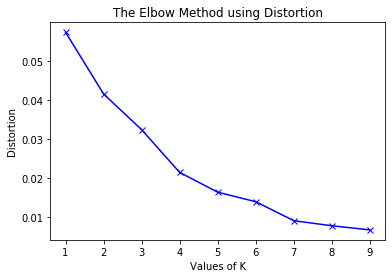

In [171]:
import matplotlib.pyplot as plt 
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

The diagram show that 7 is the optimal number of clusters for our algorithm

Now let's fit our model with KMeans Clustering

In [172]:
optimal_clusters = 7

# set number of clusters
clusters = optimal_clusters



# run k-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([6, 0, 0, 3, 0, 0, 6, 6, 3, 3])

Now we will merge the cluster labels with the neighborhood dataset

In [173]:

lahore_hotel.insert(0, 'Cluster Labels', kmeans.labels_)

lahore_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
lahore_merged = lahore_merged.join(lahore_hotel.set_index('Neighborhood'), on='Neighborhood')

lahore_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,Hotel,Shopping Mall
2,Agrics Town,31.4415700,74.2244467,6,0.000000,0.000000
5,Ali Park,31.4996549,74.4073399,0,0.029412,0.029412
6,Ali View,31.4931287,74.4041212,0,0.052632,0.026316
10,Anarkli,31.5679445,74.3074319,3,0.072727,0.000000
11,Askari Flats,31.4933113,74.3848557,0,0.028571,0.000000


Let's visualise the results of our clustering on the map of Lahore

In [182]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(clusters)
ys = [i + x + (i*x)**2 for i in range(clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster2 in zip(lahore_merged['Latitude'], lahore_merged['Longitude'], lahore_merged['Neighborhood'], lahore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster2), parse_html=True)
    folium.CircleMarker(
        [float(lat),float(lon)],
        radius=5,
        popup=label,
        color=rainbow[cluster2-1],
        fill=True,
        fill_color=rainbow[cluster2-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

We can see that there are 7 different clusters all over Lahore. Let's see what each cluster has to offer towards our business problem

### Examining the clusters

#### Cluster: 0

In [175]:
lahore_merged.loc[lahore_merged['Cluster Labels'] == 0]

,Neighborhood,Latitude,Longitude,Cluster Labels,Hotel,Shopping Mall
5,Ali Park,31.4996549,74.4073399,0,0.029412,0.029412
6,Ali View,31.4931287,74.4041212,0,0.052632,0.026316
11,Askari Flats,31.4933113,74.3848557,0,0.028571,0.000000
13,Askari Villas,31.5479374,74.3924660,0,0.050000,0.050000
39,Eden Cottages,31.4842214,74.3735808,0,0.032609,0.021739
41,Farooq colony,31.4787019,74.3674921,0,0.051282,0.025641
44,Fort Villa,31.4851174,74.3796679,0,0.031915,0.021277
65,Iqbal Park,31.4861020,74.3808302,0,0.023529,0.011765
90,Model Colony,31.4747044,74.3671908,0,0.036585,0.024390
111,Nishat Colony,31.4915401,74.3927693,0,0.013889,0.013889


Cluster 0 gives neighborhoods with a healthy relationship between the hotels and shopping malls since the more hotels are present in the area the more shopping malls are there.

#### Cluster: 1

In [176]:
lahore_merged.loc[lahore_merged['Cluster Labels'] == 1]

,Neighborhood,Latitude,Longitude,Cluster Labels,Hotel,Shopping Mall
70,Jhuggian Ladha Singh,31.3849341,74.1445832,1,0.25,0.0
88,Maraka,31.3839755,74.1514837,1,0.25,0.0
127,Punjab Govt Servants Housing Foundation,31.4057118,74.1643178,1,0.25,0.0
155,TRICON VILLAGE,31.4093872,74.1657361,1,0.25,0.0


Cluster 1 gives neighborhoods with a really unhealthy relationship between the hotels and shopping malls since there are no shopping malls in the area although there are hotels

#### Cluster: 2

In [177]:
lahore_merged.loc[lahore_merged['Cluster Labels'] == 2]

,Neighborhood,Latitude,Longitude,Cluster Labels,Hotel,Shopping Mall
141,Sadhoke,31.3920197,74.2765149,2,0.0,0.25


Cluster 2 gives neighborhoods with no hotels but a presence of shopping malls

#### Cluster: 3

In [178]:
lahore_merged.loc[lahore_merged['Cluster Labels'] == 3]

,Neighborhood,Latitude,Longitude,Cluster Labels,Hotel,Shopping Mall
10,Anarkli,31.5679445,74.3074319,3,0.072727,0.000000
20,Bahria Town,31.3834063,74.1752911,3,0.083333,0.000000
26,Canal Gardens,31.3944129,74.1757053,3,0.090909,0.000000
47,Gawalmandi,31.5723061,74.3176430,3,0.079365,0.015873
72,Jubilee Town,31.4049640,74.1872397,3,0.125000,0.000000
83,Liaqatabad,31.5647371,74.3028682,3,0.061224,0.000000
89,Mazang,31.5560352,74.3129047,3,0.081967,0.000000
119,PAEC Foundation Housing,31.3822401,74.1603139,3,0.100000,0.000000
124,Police Lines,31.5668940,74.3329883,3,0.098361,0.000000
153,Sukh Chayn Gardens,31.3914660,74.1597798,3,0.100000,0.000000


Cluster 3 gives neighborhoods with a really unhealthy relationship between the hotels and shopping malls since there are almost no shopping malls in the area although there are hotels but the number of hotels are lower than that in Cluster 1

#### Cluster: 4

In [179]:
lahore_merged.loc[lahore_merged['Cluster Labels'] == 4]

,Neighborhood,Latitude,Longitude,Cluster Labels,Hotel,Shopping Mall
71,Johar Town,31.4631615,74.2939169,4,0.014706,0.088235
77,Kot Lakhpat,31.4664189,74.3382571,4,0.000000,0.116279
109,Naz Town,31.4028090,74.2653712,4,0.000000,0.142857
159,Township,31.4565063,74.3200799,4,0.000000,0.135135
162,Valencia,31.4066733,74.2582688,4,0.000000,0.142857


Cluster 4 gives neighborhoods with low hotels but a presence of shopping malls but the presence is low

#### Cluster: 5

In [180]:
lahore_merged.loc[lahore_merged['Cluster Labels'] == 5]

,Neighborhood,Latitude,Longitude,Cluster Labels,Hotel,Shopping Mall
46,Garden Town,31.5016678,74.3247728,5,0.0,0.046875
57,Gulburg,31.5119955,74.3430178,5,0.0,0.050000
80,Lahore Cantt,31.5198192,74.3783934,5,0.0,0.041667
99,Muslim Town,31.5189542,74.3245046,5,0.0,0.040000
103,Mustafa Town,31.4958155,74.2734738,5,0.0,0.043478
120,PAF Colony,31.5505060,74.3947096,5,0.0,0.052632
136,Rehman Pura,31.5224711,74.3215752,5,0.0,0.030000


Cluster 5 gives neighborhoods with no hotels but a presence of shopping malls but the presence is low

#### Cluster: 6

In [181]:
lahore_merged.loc[lahore_merged['Cluster Labels'] == 6]

,Neighborhood,Latitude,Longitude,Cluster Labels,Hotel,Shopping Mall
2,Agrics Town,31.4415700,74.2244467,6,0.0,0.0
15,Awan Town,31.5042343,74.2631971,6,0.0,0.0
18,Badami Bagh,31.6024546,74.3194736,6,0.0,0.0
34,DHA EME Sector,31.4476294,74.2142354,6,0.0,0.0
36,Defence,31.4655540,74.4246833,6,0.0,0.0
42,Fazaia Housing Scheme,31.3762898,74.2414333,6,0.0,0.0
48,Ghazi Abad,31.5505048,74.4031519,6,0.0,0.0
68,Islampura,31.5697513,74.2941974,6,0.0,0.0
69,Izmir Town,31.4111112,74.1770289,6,0.0,0.0
78,Labor Colony,31.4034529,74.2141516,6,0.0,0.0


Cluster 6 gives neighborhoods with no hotels and no shopping malls

### Labels

<div>

After examining the clusters we have come up with the following labels for each cluster:<br><br>    
    
<b>Cluster 0 :</b>  Medium/High hotels and Medium/High shopping malls<br>
<b>Cluster 1 :</b>  High hotels and no shopping malls<br>
<b>Cluster 2 :</b>  No hotels and High shopping malls<br>
<b>Cluster 3 :</b>  Medium/High hotels and low shopping malls<br>
<b>Cluster 4 :</b>  Low hotels and Medium/High shopping malls<br>
<b>Cluster 5 :</b>  No hotels and low shopping malls<br>
<b>Cluster 6 :</b>  No hotels and no shopping malls<br></div>

Now, let's pick the neighborhoods with the clusters that are "High hotels and no shopping malls" and "Medium/High hotels and low shopping malls" because they satisfy our business problem because in these neighborhoods there is an opportunity to build shopping malls for the tourists

In [187]:
desirable_neighborhoods = lahore_merged[(lahore_merged['Cluster Labels'] == 1) |  (lahore_merged['Cluster Labels'] == 3)]

In [188]:
desirable_neighborhoods

,Neighborhood,Latitude,Longitude,Cluster Labels,Hotel,Shopping Mall
10,Anarkli,31.5679445,74.3074319,3,0.072727,0.000000
20,Bahria Town,31.3834063,74.1752911,3,0.083333,0.000000
26,Canal Gardens,31.3944129,74.1757053,3,0.090909,0.000000
47,Gawalmandi,31.5723061,74.3176430,3,0.079365,0.015873
70,Jhuggian Ladha Singh,31.3849341,74.1445832,1,0.250000,0.000000
72,Jubilee Town,31.4049640,74.1872397,3,0.125000,0.000000
83,Liaqatabad,31.5647371,74.3028682,3,0.061224,0.000000
88,Maraka,31.3839755,74.1514837,1,0.250000,0.000000
89,Mazang,31.5560352,74.3129047,3,0.081967,0.000000
119,PAEC Foundation Housing,31.3822401,74.1603139,3,0.100000,0.000000


In [189]:
desirable_neighborhoods.shape

(16, 6)

So in conclusion these 16 neighborhoods have potential chance of building shopping malls because of the presence of hotels in the area which will help tourism industry